In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-data-2008-19/matches.csv
/kaggle/input/ipl-data-2008-19/deliveries.csv


# Importing all required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [3]:
df1 = pd.read_csv("/kaggle/input/ipl-data-2008-19/matches.csv")
df2 = pd.read_csv("/kaggle/input/ipl-data-2008-19/deliveries.csv")
matches = pd.DataFrame(df1)
deliveries = pd.DataFrame(df2)

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Exploratory Data Analysis

### Total Number of innings of the all the matches played

In [9]:
# total number of innings of the matches played
uid_match = deliveries["match_id"].unique()
# a variable "uid_match" saves collection of unique match ids
r = []
for i in uid_match:
    r.append(deliveries["inning"][deliveries["match_id"]==i].unique())
# the unique number of innings for each unique match id is saved in the form of lists in a list "r".
import numpy as np

count=[]
for i in r:
    count.append(np.count_nonzero(i==1))
    count.append(np.count_nonzero(i==2))
    count.append(np.count_nonzero(i==3))
    count.append(np.count_nonzero(i==4))
    count.append(np.count_nonzero(i==5))
# .count_nonzero method counts element in each list of r and appends 1 for the element that matches value of i and 0 for the other elements in the list "count".

total_innings = count.count(1)
total_innings
# the number of 1's in list "count" indiacate the number of total innings

1528

### How many IPL seasons are we using to analyze ?

In [10]:
# how many IPL seasons are we using to analyse ?

matches["season"].value_counts().count()

12

* We are analysing data of **12** seasons from **2008** to **2019**.

###  Total number of matches played according to the dataset

In [11]:
# Total number of matches played according to the dataset

deliveries["match_id"].nunique()

756

### Which IPL team won by maximum runs

In [12]:
# which IPL team won by maximum runs

matches[matches["win_by_runs"]==(matches["win_by_runs"].max())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


### Which IPL team won by minimum runs

In [13]:
# which IPL team won by minimum runs

matches["winner"][matches["win_by_runs"]==(matches["win_by_runs"][(matches["win_by_runs"]!=0)].min())].value_counts()

winner
Mumbai Indians                 3
Kings XI Punjab                2
Royal Challengers Bangalore    2
Delhi Daredevils               1
Chennai Super Kings            1
Gujarat Lions                  1
Name: count, dtype: int64

### Which IPL team won by consuming maximum wickets?

In [14]:
#which IPL team won by consuming maximum wickets?

matches["winner"][matches["win_by_wickets"]==(matches["win_by_wickets"].max())].value_counts()

winner
Royal Challengers Bangalore    3
Kolkata Knight Riders          1
Kings XI Punjab                1
Deccan Chargers                1
Delhi Daredevils               1
Rajasthan Royals               1
Mumbai Indians                 1
Chennai Super Kings            1
Sunrisers Hyderabad            1
Name: count, dtype: int64

### Which IPL team won by consuming minimum wickets

In [15]:
# which IPL team won by consuming minimum wickets

matches["winner"][matches["win_by_wickets"]==(matches["win_by_wickets"][matches["win_by_wickets"]!=0].min())]

559    Kolkata Knight Riders
636      Chennai Super Kings
642      Sunrisers Hyderabad
Name: winner, dtype: object



* We are analyzing total **12** seasons of IPL
* The Total Number of innings in this dataset is **1528**
* Total of **756** matches have been played
* The IPL team that has won matches with Maximum runs and Minimum runs is **Mumbai Indians**
* The IPL team that has won by taking Maximum wickets is **Royal Challengers Bangalore**
* The IPL teams that has won matches by taking minimum wickets are **Kolkata Knight Riders, Chennai Super Kings, Sunrisers Hyderabad**. All of them each have won one match by taking minimum wickets.



# Visualization

### Which season has highest number of matches ever played ?

In [16]:
# which season has highest number of matches ever played ?

matches["season"].value_counts().idxmax()

2013

 Most number of matches were played in season of year **2013**

 Let's see plot for number of matches played in each season, below.

<Axes: xlabel='season'>

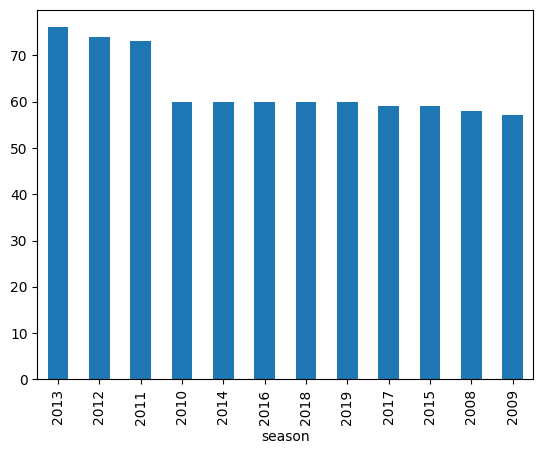

In [17]:
matches["season"].value_counts().plot(kind='bar')

## which is the most successful IPL team with all the data at hand

In [18]:
# 1. total number of wins for each team

matches["winner"].value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

<Axes: xlabel='winner'>

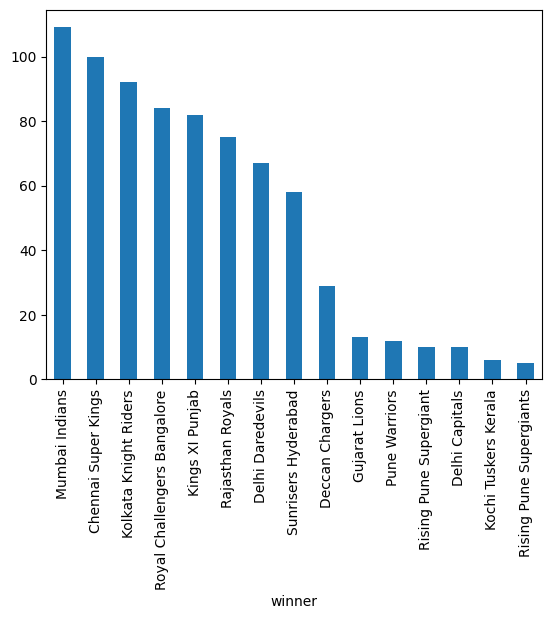

In [19]:
matches["winner"].value_counts().plot(kind="bar")

In [20]:
# 2. Team with highest number of wins

matches["winner"].value_counts().idxmax()

'Mumbai Indians'

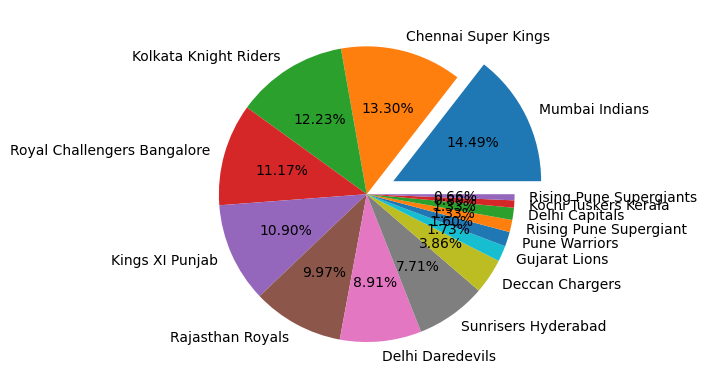

<Figure size 2000x1500 with 0 Axes>

In [21]:
# 3. win percentage for each team


x = matches["winner"].value_counts()

plt.pie(x, labels=["Mumbai Indians","Chennai Super Kings","Kolkata Knight Riders","Royal Challengers Bangalore","Kings XI Punjab","Rajasthan Royals","Delhi Daredevils","Sunrisers Hyderabad","Deccan Chargers","Gujarat Lions","Pune Warriors","Rising Pune Supergiant","Delhi Capitals","Kochi Tuskers Kerala","Rising Pune Supergiants"], autopct="%0.2f%%", explode=[0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
plt.figure(figsize=(20,15))
plt.show()

 * The IPL team with *highest number of wins* is **Mumbai Indians**.
 * Win percentage for each team for total matches played is are:


1. **Mumbai Indians - 14.49%**
2.  **Chennai Super Kings - 13.30%**
3. **Kolkata Knight Riders - 12.23%**
4. **Royal Challengers Bangalore - 11.17%**
5.  **Kings XI Punjab - 10.90%**




 as we can see here the 5 teams with highest winning percentage
These teams can be our candidates for most successful IPL team

In [22]:
# win by runs and wickets
matches["winner"][matches["win_by_wickets"]!=0].value_counts()

winner
Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: count, dtype: int64

In [23]:
matches["winner"][matches["win_by_runs"]!=0].value_counts()

winner
Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: count, dtype: int64

In [24]:
df1 = pd.DataFrame(matches["winner"][matches["win_by_wickets"]!=0].value_counts())
df2 = pd.DataFrame(matches["winner"][matches["win_by_runs"]!=0].value_counts())

In [25]:
win_comp = pd.DataFrame(df1)
win_comp.rename(columns={"winner":"winbywickets"}, inplace=True)
win_comp["winbyruns"] = df2

In [26]:
win_comp

,count,winbyruns
winner,,
Kolkata Knight Riders,56,36
Mumbai Indians,50,57
Royal Challengers Bangalore,48,35
Chennai Super Kings,48,52
Rajasthan Royals,46,27
Kings XI Punjab,42,38
Delhi Daredevils,42,25
Sunrisers Hyderabad,27,30
Gujarat Lions,12,1


In [27]:
win_comp["team"]= win_comp.index
win_comp.reset_index(drop=True)

,count,winbyruns,team
0,56,36,Kolkata Knight Riders
1,50,57,Mumbai Indians
2,48,35,Royal Challengers Bangalore
3,48,52,Chennai Super Kings
4,46,27,Rajasthan Royals
5,42,38,Kings XI Punjab
6,42,25,Delhi Daredevils
7,27,30,Sunrisers Hyderabad
8,12,1,Gujarat Lions
9,11,18,Deccan Chargers


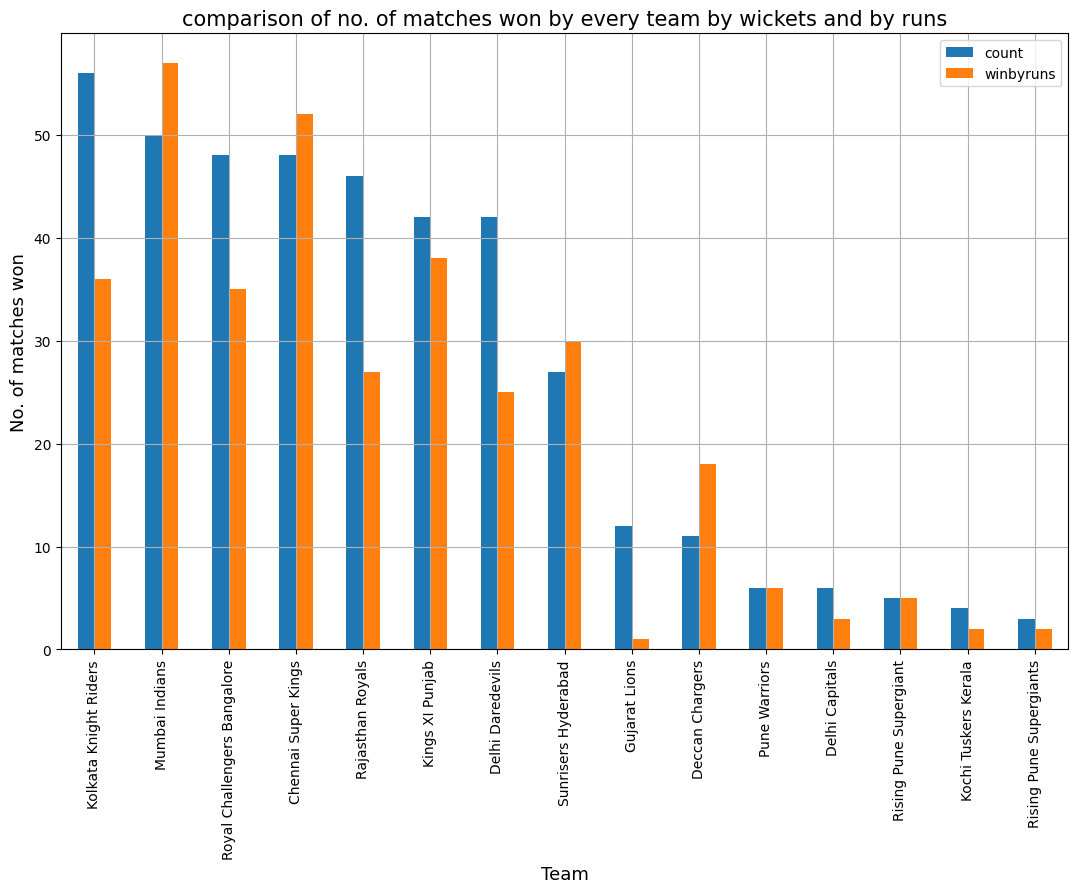

In [28]:
win_comp.plot(kind="bar", figsize=(13,8))
plt.xlabel("Team", fontsize=13)
plt.ylabel("No. of matches won", fontsize=13)
plt.title("comparison of no. of matches won by every team by wickets and by runs", fontsize=15)
plt.grid()
plt.show()

* **Kolkata Knight Riders**	has won most of their matches,**56** by taking all the wickets.
* **Mumbai Indians** has won most of their matches,**57** by completing target runs.

We plotted the number of matches every team has won by wickets or by runs. Mumbai Indians, Chennai Super Kings are two teams who has won large number of matches and dont have large gap between number of matches won by wickets or won by runs.
Which suggests that these teams are equally strong or balanced in batting, bowling and fielding.

### Players who have won "player of the match"

In [29]:
# Players who have won "player of the match"
matches["player_of_match"].value_counts()

player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: count, Length: 226, dtype: int64

the Player who has won **"Player of the match**" most **21** times is **CH Gayle**.

### home and away performance

In [30]:
# home and away performance
matches.head()
col = ['city','team1','team2','winner']
matches_df = matches[col]
matches_df

,city,team1,team2,winner
0,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
...,...,...,...,...
751,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians
752,Chennai,Chennai Super Kings,Mumbai Indians,Mumbai Indians
753,Visakhapatnam,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals
754,Visakhapatnam,Delhi Capitals,Chennai Super Kings,Chennai Super Kings


# **Performance of teams thorough years**

## Mumbai Indians

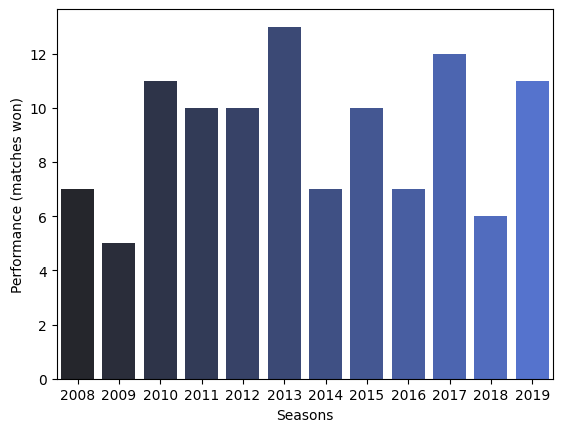

In [31]:
# performance of teams thorough years

miperf = matches["season"].sort_values()[matches["winner"]=="Mumbai Indians"].value_counts()
sns.barplot(x=miperf.index, y=miperf.values, palette="dark:royalBlue")
plt.xlabel("Seasons")
plt.ylabel("Performance (matches won)")
plt.show()

This data indicates team **Mumbai Indians**'s performance has fluctuated over the years, with some seasons witnessing more success than others.
* The year **2013** is most successful season for the team, with **13 victories**, indicating that they performed good during that period. on contrary, in year **2009**, team struggled with only **5 wins**, suggesting weaker performance than other years.
* Mumbai Indians **performed very well** in years **2013, 2017, 2010 and 2019**.
* They **performed poorly** in years **2009 and 2018.**

## Kolkata Knight Riders

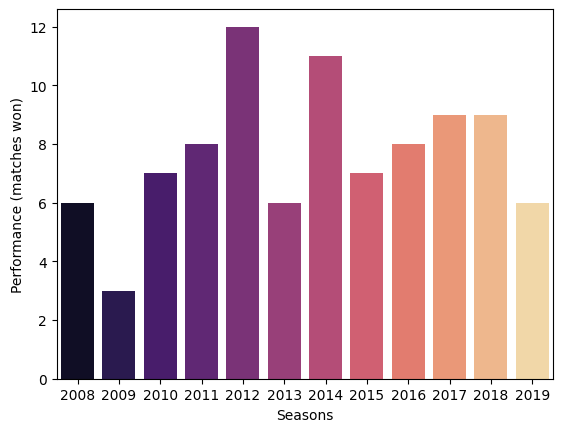

In [32]:
kkrperf = matches["season"].sort_values()[matches["winner"]=="Kolkata Knight Riders"].value_counts()
sns.barplot(x=kkrperf.index, y=kkrperf.values,palette='magma')
plt.xlabel("Seasons")
plt.ylabel("Performance (matches won)")
plt.show()

This data indicates team **Kolkata Knight Riders**'s performance has fluctuated over the years, with some seasons witnessing more successful than others.
* The year **2012** is most successful season for the team, with **12 victories**, indicating that they performed good during that period. on contrary, in year **2009**, team struggled with only **3 wins**, suggesting weaker performance than other years.
* Kolkata Knight Riders **performed well** in years **2012 and 2014**.
* They **performed poorly** in years **2009 and 2019.**

## Royal Challengers Bangalore

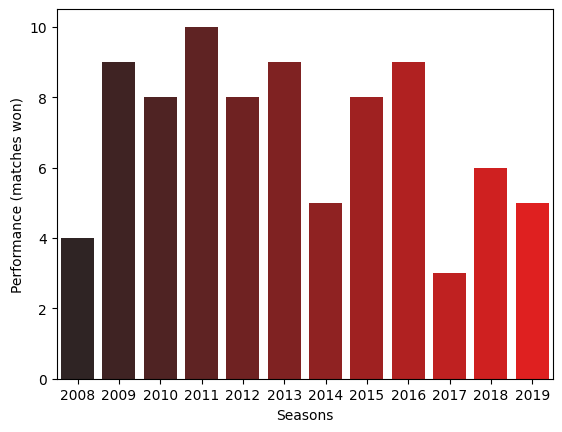

In [33]:
rcbperf = matches["season"].sort_values()[matches["winner"]=="Royal Challengers Bangalore"].value_counts()
sns.barplot(x=rcbperf.index, y=rcbperf.values, palette="dark:red")
plt.xlabel("Seasons")
plt.ylabel("Performance (matches won)")
plt.show()

This data indicates team **Royal Challengers Bangalore**'s performance has fluctuated over the years, with some seasons witnessing more successful than others.
* The year **2011** is most successful season for the team, with **10 victories**, indicating that they performed good during that period. on contrary, in year **2017**, team struggled with only **3 wins**, suggesting weaker performance than other years.
* Royal Challengers Bangalore **performed well** in years **2011**.
* They **performed poorly** in years **2008 and 2017.**

## Chennai Super Kings

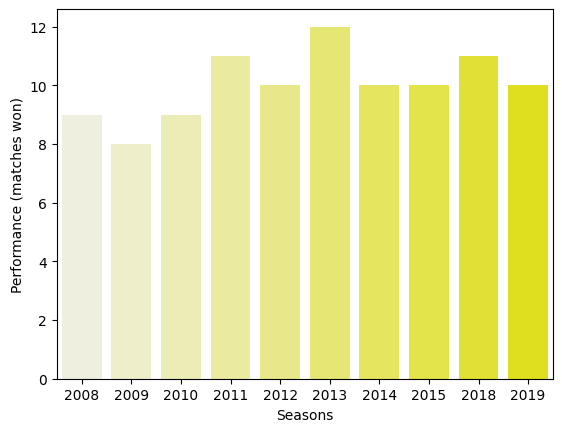

In [34]:
cskperf = matches["season"].sort_values()[matches["winner"]=="Chennai Super Kings"].value_counts()
sns.barplot(x=cskperf.index, y=cskperf.values, palette="light:yellow")
plt.xlabel("Seasons")
plt.ylabel("Performance (matches won)")
plt.show()

This data indicates team **Chennai Super Kings**'s performance has fluctuated over the years, with some seasons witnessing more successful than others.
* The year **2013** is most successful season for the team, with **12 victories**, indicating that they performed good during that period. on contrary, in year **2009**, team struggled with only **8 wins**, suggesting comparatively weaker performance than other years.
* Chennai Super Kings **performed well** in years **2013, 2011 and 2018**.
* They **performed poorly** in years **2010 and 2009.**

## Rajasthan Royals

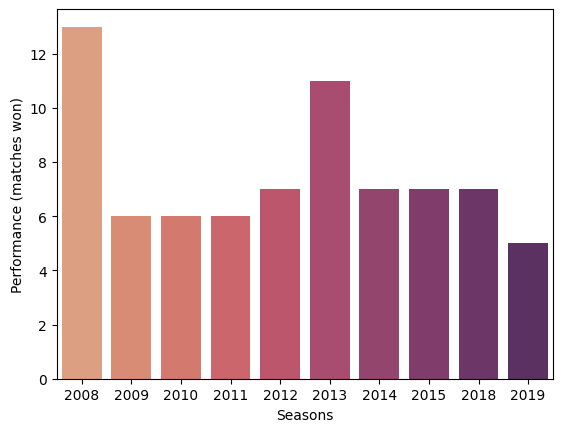

In [35]:
rrperf = matches["season"].sort_values()[matches["winner"]=="Rajasthan Royals"].value_counts()
sns.barplot(x=rrperf.index, y=rrperf.values, palette="flare")
plt.xlabel("Seasons")
plt.ylabel("Performance (matches won)")
plt.show()

This data indicates team **Rajasthan Royals**'s performance has fluctuated over the years, with some seasons witnessing more successful than others.
* The year **2008** is most successful season for the team, with **13 victories**, indicating that they performed good during that period. on contrary, in year **2019**, team struggled with only **5 wins**, suggesting comparatively weaker performance than other years.
* Rajasthan Royals **performed well** in years **2008 and 2013**.
* They **performed poorly** in years **2019.**

## Kings XI Punjab

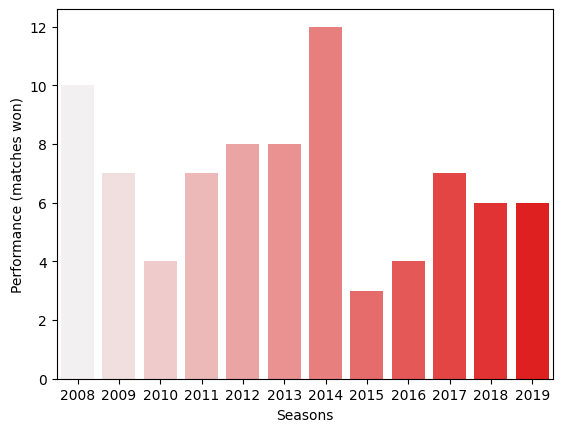

In [36]:
kxipperf = matches["season"].sort_values()[matches["winner"]=="Kings XI Punjab"].value_counts()
sns.barplot(x=kxipperf.index, y=kxipperf.values, palette="light:Red")
plt.xlabel("Seasons")
plt.ylabel("Performance (matches won)")
plt.show()

This data indicates team **Kings XI Punjab**'s performance has fluctuated over the years, with some seasons witnessing more successful than others.
* The year **2014** is most successful season for the team, with **12 victories**, indicating that they performed good during that period. on contrary, in year **2015**, team struggled with only **3 wins**, suggesting comparatively weaker performance than other years.
* Kings XI Punjab **performed well** in years **2008 and 2014**.
* They **performed poorly** in years **2015.**

## Delhi Daredevils

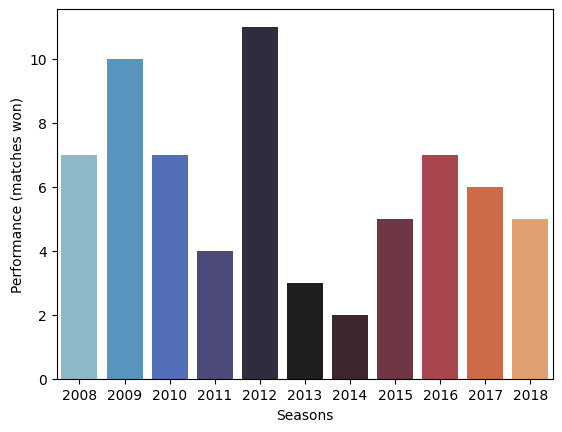

In [37]:
ddperf = matches["season"].sort_values()[matches["winner"]=="Delhi Daredevils"].value_counts()
sns.barplot(x=ddperf.index, y=ddperf.values, palette = "icefire")
plt.xlabel("Seasons")
plt.ylabel("Performance (matches won)")
plt.show()

This data indicates team **Delhi Daredevils**'s performance has fluctuated over the years, with some seasons witnessing more successful than others.
* The year **2012** is most successful season for the team, with **11 victories**, indicating that they performed good during that period. on contrary, in year **2014**, team struggled with only **2 wins**, suggesting comparatively weaker performance than other years.
* Delhi Daredevils **performed well** in years **2009 and 2012**.
* They **performed poorly** in years **2014.**
* This team's performance in recent years has not been great which overall suggests it is one of the weak teams to play in IPL.

## Sunrisers Hyderabad

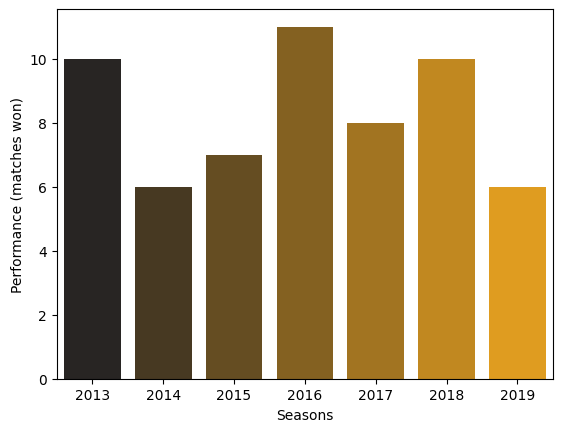

In [38]:
srhperf = matches["season"].sort_values()[matches["winner"]=="Sunrisers Hyderabad"].value_counts()
sns.barplot(x=srhperf.index, y=srhperf.values, palette = "dark:orange")
plt.xlabel("Seasons")
plt.ylabel("Performance (matches won)")
plt.show()

This data indicates team **Sunrisers Hyderabad**'s performance over the years 2013 to 2019, with some seasons witnessing more successful than others.
* The year **2016** is most successful season for the team, with **11 victories**, indicating that they performed good during that period. on contrary,in year **2019**, team struggled with only **6 wins**, suggesting comparatively weaker performance than other years.
* Sunrisers Hyderabad **performed well** in years **2016 and 2013**.
* They **performed poorly** in years **2019.**


### Which season consisted highest number of matches ever played

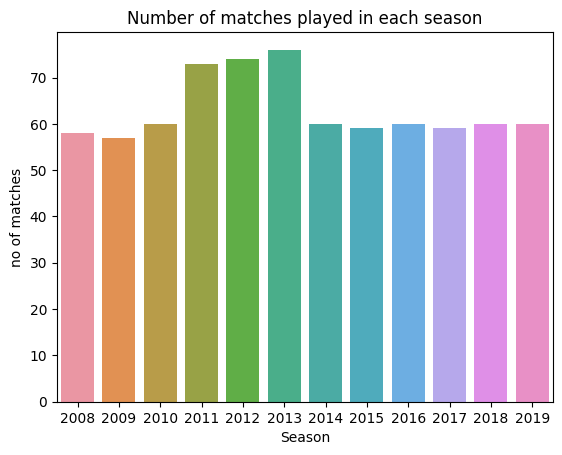

<Figure size 1000x2000 with 0 Axes>

In [39]:
# which season consisted highest number of matches ever played

sns.countplot(x = matches["season"])
plt.xlabel("Season")
plt.ylabel("no of matches")
plt.title("Number of matches played in each season")
plt.figure(figsize=(10,20))
plt.show()

* In season of **2013** **most number of matches**, that is **76** were played.
* In season of **2009** **least number of matches**, that is **57** were played.

### Top players of winning matches

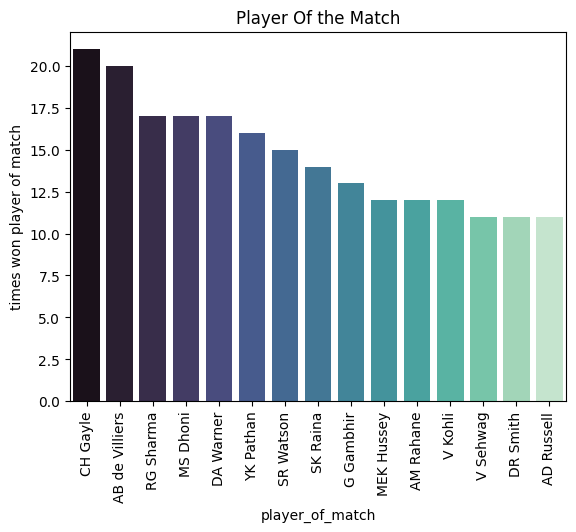

<Figure size 1500x500 with 0 Axes>

In [40]:
# top players of winning matches

top_players = matches["player_of_match"].value_counts().head(15)
sns.barplot(x=top_players.index, y=top_players, palette="mako")
plt.ylabel("times won player of match")
plt.xticks(rotation=90)
plt.title("Player Of the Match")
plt.figure(figsize=(15,5))
plt.show()

* **Top 5** players of **winning matches** with number of times they won **player of match**:


1.   **CH Gayle - 21**
2.   **AB de Villiers - 20**
3.   **RG Sharma - 17**
4.   **MS Dhoni - 17**
5.   **DA Warner - 17**



### Matches according to venues

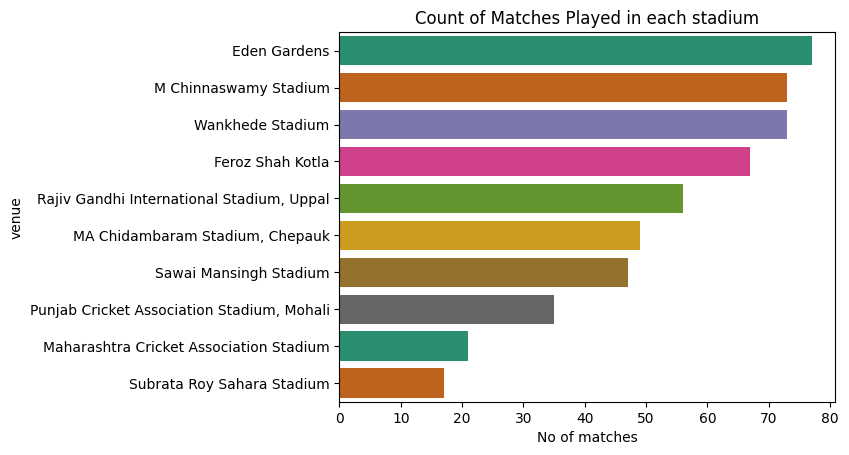

In [41]:
# matches according to venues

sns.countplot(y="venue",data=matches, order=matches["venue"].value_counts().head(10).index, palette="Dark2")
plt.xlabel("No of matches")
plt.title("Count of Matches Played in each stadium")
plt.show()


* **Most matches** were played in **Eden Gardens stadium** over the years.

### The number of matches played by each team

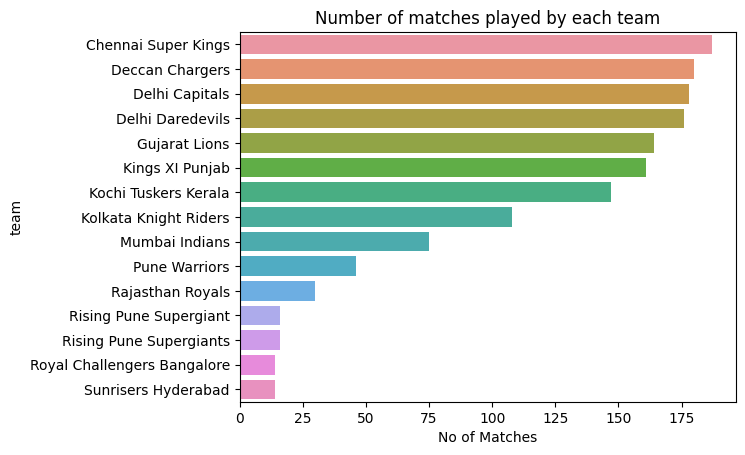

In [42]:
# The number of matches played by each team

total_matches = matches["team1"].value_counts() + matches["team2"].value_counts()
sns.barplot(x=total_matches.sort_values(ascending=False), y = total_matches.index)
plt.xlabel("No of Matches")
plt.ylabel("team")
plt.title("Number of matches played by each team")
plt.show()

**Top 5 - Number of matches played by each team**:
* Mumbai Indians               -  **187**
* Royal Challengers Bangalore  -  **180**
* Kolkata Knight Riders        -  **178**
* Kings XI Punjab              -  **176**
* Chennai Super Kings          -  **164**



### The winners in each season

In [43]:
# the winners in each season

seasons = matches["season"].drop_duplicates().tolist()
r = []
for i in seasons:
    r.append(matches["winner"][matches["season"]==i].iloc[-1])

final_win = pd.DataFrame(data = r, index=seasons)
final_win

,0
2017,Mumbai Indians
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad


### IPL Finals venues and winners along with the number of wins

In [44]:
# IPL Finals venues and winners along with the number of wins.

seasons = matches["season"].drop_duplicates().tolist()
r = []
for i in seasons:
    r.append(matches[["winner","venue"]][matches["season"]==i].iloc[-1])

final_win = pd.DataFrame(data = r, index=seasons)
final_win

,winner,venue
2017,Mumbai Indians,"Rajiv Gandhi International Stadium, Uppal"
2008,Rajasthan Royals,Dr DY Patil Sports Academy
2009,Deccan Chargers,New Wanderers Stadium
2010,Chennai Super Kings,Dr DY Patil Sports Academy
2011,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk"
2012,Kolkata Knight Riders,"MA Chidambaram Stadium, Chepauk"
2013,Mumbai Indians,Eden Gardens
2014,Kolkata Knight Riders,M Chinnaswamy Stadium
2015,Mumbai Indians,Eden Gardens
2016,Sunrisers Hyderabad,M Chinnaswamy Stadium


In [45]:
# no of final wins for each team

final_win["winner"].value_counts()

winner
Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: count, dtype: int64

* Team **Mumbai Indians** have won most **4 season finale** matches and thus have won those respective seasons as well.

Text(0.5, 1.0, 'percentage of finals each team has won')

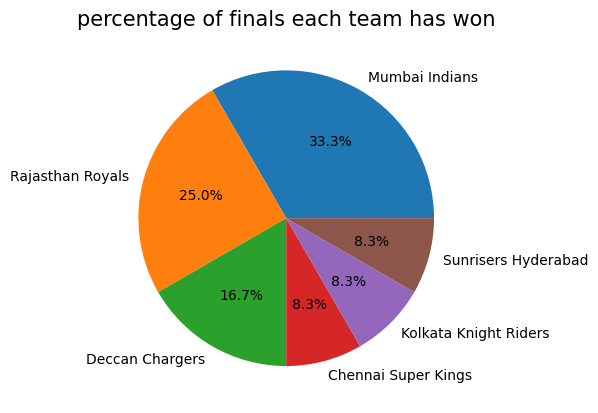

In [46]:
plt.pie(final_win["winner"].value_counts(),labels=final_win["winner"].drop_duplicates(),autopct="%0.01f%%")
plt.title("percentage of finals each team has won",fontsize=15)

### The number of seasons won by each team

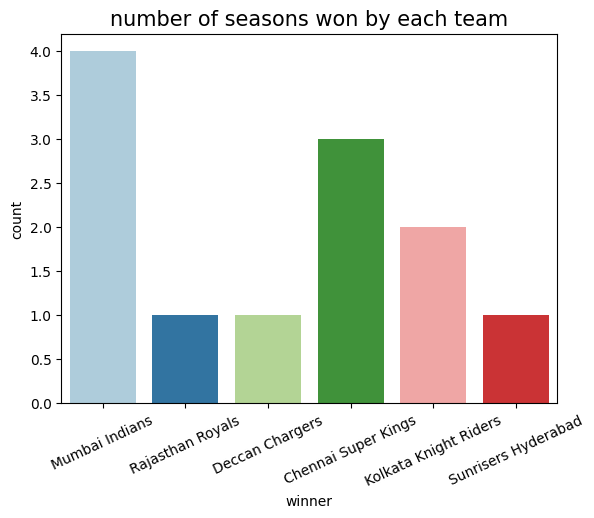

In [47]:
# The number of seasons won by each team

sns.countplot(x = final_win["winner"], palette="Paired")
plt.xticks(rotation=25)
plt.title("number of seasons won by each team", fontsize=15)
plt.show()


### The toss winner, toss decision, winner in final matches.

In [48]:
# The toss winner, toss decision, winner in final matches.

seasons = matches["season"].drop_duplicates().tolist()
r = []
for i in seasons:
    r.append(matches[["toss_winner","toss_decision","winner"]][matches["season"]==i].iloc[-1])
    
final_toss = pd.DataFrame(data = r, index=seasons)
final_toss

,toss_winner,toss_decision,winner
2017,Mumbai Indians,bat,Mumbai Indians
2008,Rajasthan Royals,field,Rajasthan Royals
2009,Royal Challengers Bangalore,field,Deccan Chargers
2010,Chennai Super Kings,bat,Chennai Super Kings
2011,Chennai Super Kings,bat,Chennai Super Kings
2012,Chennai Super Kings,bat,Kolkata Knight Riders
2013,Mumbai Indians,bat,Mumbai Indians
2014,Kolkata Knight Riders,field,Kolkata Knight Riders
2015,Chennai Super Kings,field,Mumbai Indians
2016,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


### The man of the match for each winning team

In [49]:
seasons = matches["season"].drop_duplicates().tolist()
r = []
for i in seasons:
    r.append(matches[["player_of_match","winner"]][matches["season"]==i].iloc[-1])
    
final_POM = pd.DataFrame(data = r, index=seasons)
final_POM

,player_of_match,winner
2017,KH Pandya,Mumbai Indians
2008,YK Pathan,Rajasthan Royals
2009,A Kumble,Deccan Chargers
2010,SK Raina,Chennai Super Kings
2011,M Vijay,Chennai Super Kings
2012,MS Bisla,Kolkata Knight Riders
2013,KA Pollard,Mumbai Indians
2014,MK Pandey,Kolkata Knight Riders
2015,RG Sharma,Mumbai Indians
2016,BCJ Cutting,Sunrisers Hyderabad


### Decision in every toss either fielding or batting

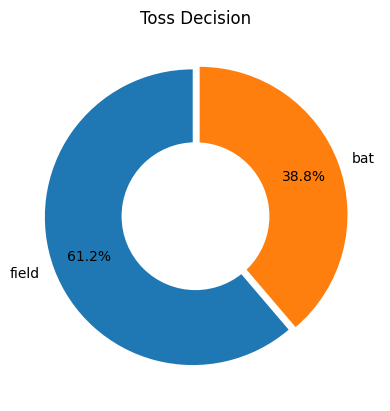

In [50]:
plt.pie(matches["toss_decision"].value_counts(),labels = matches["toss_decision"].value_counts().index, autopct = "%0.01f%%", startangle = 90, explode = (0.02,0.03), pctdistance=0.75)
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0,0),0.50,fc="white"))
plt.title("Toss Decision")
plt.show()

### What is the probability of winning a match if the toss was won?

In [51]:
# What is the probability of winning a match if the toss was won?
total_tosswins = matches["toss_winner"].count()
toss_and_match = matches[matches["toss_winner"]==matches["winner"]].shape[0]
probability = toss_and_match / total_tosswins
probability


0.5198412698412699

### total number of fours hit by each team

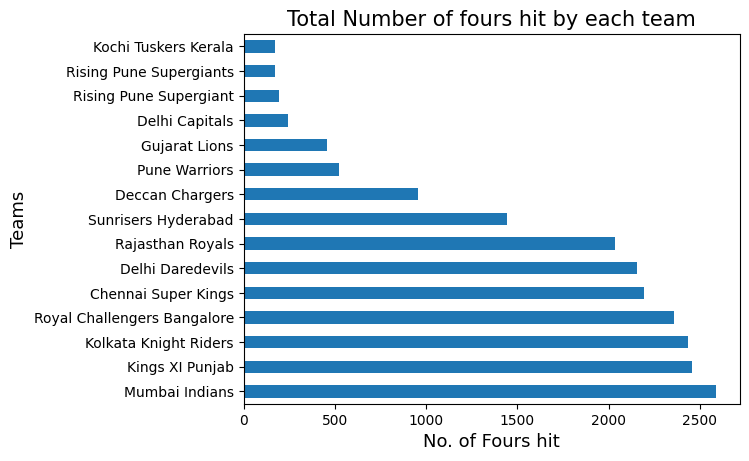

In [52]:
# total number of fours hit by each team

four_hitby_teams = deliveries["batting_team"][deliveries["batsman_runs"]==4].value_counts()
four_hitby_teams.plot(kind="barh")
plt.xlabel("No. of Fours hit", fontsize=13)
plt.ylabel("Teams", fontsize=13)
plt.title("Total Number of fours hit by each team", fontsize=15)
plt.show()

### The total runs by fours hit 

In [53]:
# The total runs by fours hit 
deliveries["batsman_runs"][deliveries["batsman_runs"]==4].sum()

81568

### The total number of fours hit by each team

Text(0.5, 1.0, 'Number of fours hit by each team')

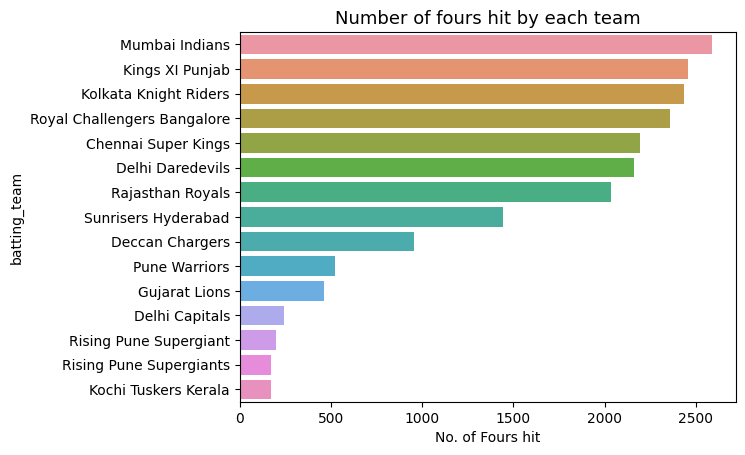

In [54]:
# the total number of fours hit by each team
total_fours = deliveries[deliveries["batsman_runs"] == 4].groupby("batting_team")["batsman_runs"].count().sort_values(ascending=False)
sns.barplot(y = total_fours.index, x = total_fours.values)
plt.xlabel("No. of Fours hit")
plt.title("Number of fours hit by each team",fontsize=13)

### The fours hit by players

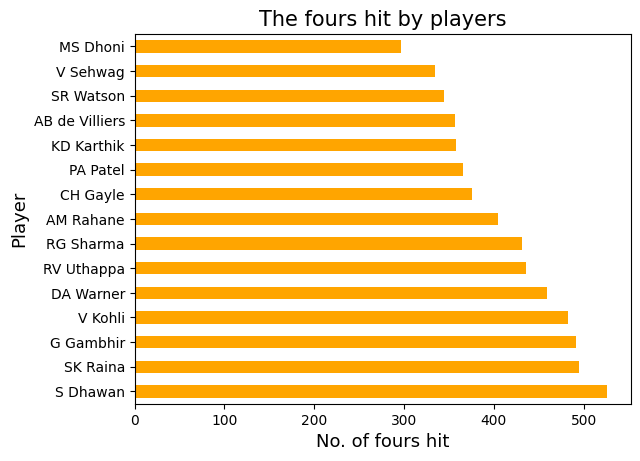

In [55]:
# The fours hit by players
fours = deliveries["batsman"][deliveries["batsman_runs"]==4].value_counts().head(15)
fours.plot(kind="barh", color = "orange")
plt.xlabel("No. of fours hit", fontsize= 13)
plt.ylabel("Player", fontsize=13)
plt.title("The fours hit by players", fontsize=15)
plt.show()

### The number of fours hit in each season

In [56]:
# The number of fours hit in each season

deliveries["match_id"][deliveries["batsman_runs"]==4].unique()
matches.groupby("season").count()

,id,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
season,,,,,,,,,,,,,,,,,
2008,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,0
2009,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,0
2010,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,0
2011,73,73,73,73,73,73,73,73,73,72,73,73,72,73,73,73,0
2012,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,0
2013,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,0
2014,60,53,60,60,60,60,60,60,60,60,60,60,60,60,60,60,0
2015,59,59,59,59,59,59,59,59,59,57,59,59,57,59,59,59,0
2016,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,0


### The total runs by the sixes hit 

In [57]:
# The total runs by the sixes hit 

deliveries["batsman_runs"][deliveries["batsman_runs"]==6].sum()

49020

### Number of sixes hit by each team

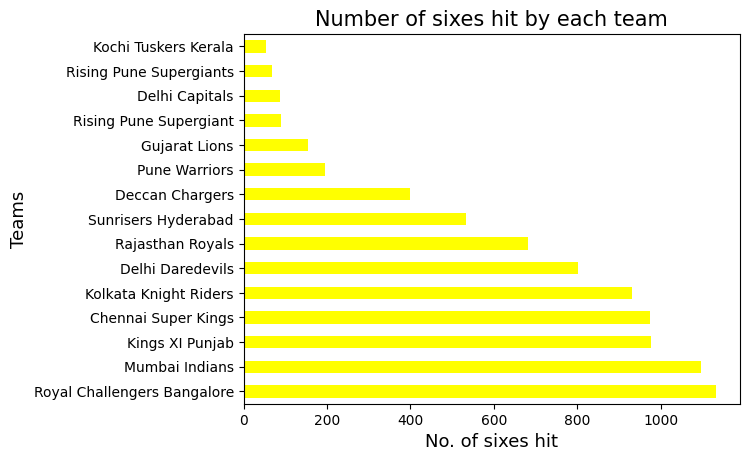

In [58]:
#  number of sixes hit by each team

top_sixes = deliveries["batting_team"][deliveries["batsman_runs"]==6].value_counts()
top_sixes.plot(kind="barh", color = "yellow")
plt.ylabel("Teams", fontsize=13)
plt.xlabel("No. of sixes hit", fontsize = 13)
plt.title("Number of sixes hit by each team", fontsize=15)
plt.show()

### The top 10 leading run scoreres in IPL

In [59]:
# the top 10 leading run scoreres in IPL
batsmen = deliveries["batsman"].drop_duplicates()
r = []
for i in batsmen:
    r.append(deliveries["batsman_runs"][deliveries["batsman"]==i].sum())

lead_batsmen = pd.DataFrame(data = r, index=batsmen)

<Axes: title={'center': 'top 10 leading run scoreres in IPL'}, xlabel='batsman', ylabel='Runs'>

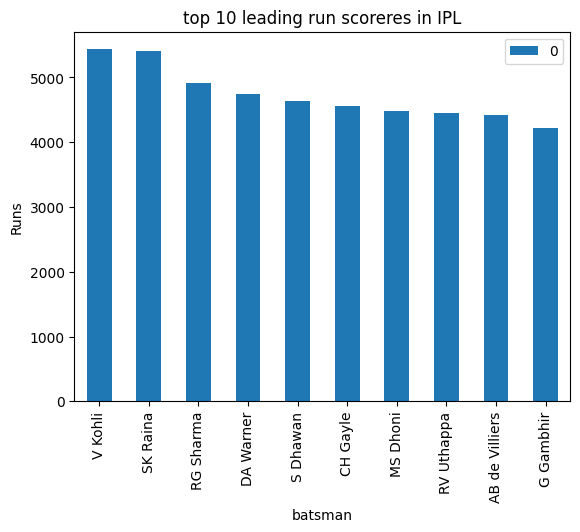

In [60]:
top_10 = pd.DataFrame(lead_batsmen.nlargest(10,lead_batsmen.iloc[:,:1]))
top_10.plot(kind="bar", ylabel="Runs", title="top 10 leading run scoreres in IPL")

# Conclusion

#### In this analysis of IPL data from 2017 to 2020, we aimed to uncover insightful patterns and trends that define the tournament's dynamics and performance metrics. Our comprehensive exploration included examining team performances, player statistics, match outcomes, and other significant factors.

## Key Findings:

#### *  **Team Performance and Consistency:** Teams like Mumbai Indians and Chennai Super Kings consistently performed well, reaching playoffs and finals frequently. Their strategic planning, balanced squads, and effective leadership contributed significantly to their success
#### *  **Home vs. Away Matches:** Home advantage played a notable role, with teams generally performing better on their home grounds. The familiar conditions and support from local fans likely contributed to this trend.
#### *  **Player Contributions:** Star players like Virat Kohli, Rohit Sharma, and AB de Villiers consistently topped the batting charts, while bowlers like Jasprit Bumrah and Kagiso Rabada were crucial in securing wins for their teams.
#### The impact of all-rounders, such as Hardik Pandya and Andre Russell, was significant, providing crucial balance and flexibility to their respective teams
#### *  **Run Rates and Scoring Patterns:** The scoring rates varied across different venues, with some grounds favoring high-scoring games due to smaller boundaries and flat pitches.Powerplay overs were critical in setting the pace for the innings, with aggressive batting strategies leading to higher run rates in the initial overs.
#### *  **Impact of Foreign Players:** Overseas players like David Warner, Rashid Khan, and Chris Gayle played pivotal roles, bringing in diverse skills and experiences that enriched the overall quality of the tournament.
#### *  **Emerging Talents:** The IPL continued to be a platform for emerging talents, with young players like Rishabh Pant, Shubman Gill, and Prithvi Shaw making significant impacts and earning national team call-ups.

## Strategic Implications:


#### * **Team Composition and Auction Strategies:** Insights from player performances and team dynamics can guide future team compositions and auction strategies, focusing on acquiring players who consistently perform well under different conditions.
#### *  **Venue-Specific Preparations:** Teams can tailor their training and strategies based on venue-specific characteristics to maximize their chances of success.
#### *  **Toss and Match Strategies:** Understanding the importance of toss decisions and adapting match strategies accordingly can enhance the likelihood of winning crucial games.

#### In conclusion, the IPL remains a dynamic and competitive tournament where strategic planning, effective team management, and individual brilliance converge to create thrilling cricketing spectacles. This analysis not only sheds light on past performances but also provides valuable insights for teams and players to refine their approaches in future seasons.